# Assignment 3: Exploring Tree-Based Regression Methods for 3D Sinusoidal Data
## DTSC 680: Applied Machine Learning

## Name: Ejegu Smith

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 3D sinusoidal data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually (you're likely going to be _way_ off).  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

## Preliminaries

Let's import some common packages:

In [64]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
#matplotlib inline
%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    fig = plt.figure(figsize=[15, 10])

    #first plot
    ax1 = fig.add_subplot(2, 2, 1, projection = '3d')
    ax1.scatter(data_df['x'], data_df['y'], data_df['z'] , cmap='blues')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    plt.xticks(range(0, 16, 2))
    plt.yticks(range(-6, 8, 2))
    ax1.set_zticks(range(0, 10, 2))

    #second plot
    ax2 = fig.add_subplot(2, 2, 2, projection = '3d')
    ax2.scatter(data_df['x'], data_df['y'], data_df['z'], cmap='blues')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    plt.xticks(range(0, 16, 2))
    plt.yticks(range(-6, 8, 2))
    ax2.set_zticks(range(0, 10, 2))

    #third plot
    ax3 = fig.add_subplot(2, 2, 3, projection = '3d')
    ax3.scatter(data_df['x'], data_df['y'], data_df['z'],  cmap='blues')
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_zlabel('z')
    plt.xticks(range(0, 16, 2))
    plt.yticks(range(-6, 8, 2))
    ax3.set_zticks(range(0, 10, 2))

    #fourth plot
    ax4 = fig.add_subplot(2, 2, 4, projection = '3d')
    ax4.scatter(data_df['x'], data_df['y'], data_df['z'],  cmap='blues')
    ax4.set_xlabel('x')
    ax4.set_ylabel('y')
    ax4.set_zlabel('z')
    plt.xticks(range(0, 16, 2))
    plt.yticks(range(-6, 8, 2))
    ax4.set_zticks(range(0, 10, 2))

def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig = plt.figure(figsize=[15, 10])
    
    ## first subplot
    ax1 = fig.add_subplot(2,2,1, projection='3d')
    ax1.scatter3D(scat_x, scat_y, scat_z)
    ax1.plot(fit_x, fit_y, fit_z, color = "black")
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    plt.xticks(range(0, 16, 2))
    plt.yticks(range(-6, 8, 2))
    ax1.set_zticks(range(0, 10, 2))

    #second plot
    ax2 = fig.add_subplot(2, 2, 2, projection = '3d')
    ax2.scatter3D(scat_x, scat_y, scat_z)
    ax2.plot3D(fit_x, fit_y, fit_z, color = "black")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')
    plt.xticks(range(0, 16, 2))
    plt.yticks(range(-6, 8, 2))
    ax2.set_zticks(range(0, 10, 2))

    #third plot
    ax3 = fig.add_subplot(2, 2, 3, projection = '3d')
    ax3.scatter3D(scat_x, scat_y, scat_z)
    ax3.plot3D(fit_x, fit_y, fit_z, color = "black")
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_zlabel('z')
    plt.xticks(range(0, 16, 2))
    plt.yticks(range(-6, 8, 2))
    ax3.set_zticks(range(0, 10, 2))

    #fourth plot
    ax4 = fig.add_subplot(2, 2, 4, projection = '3d')
    ax4.scatter3D(scat_x, scat_y, scat_z)
    ax4.plot3D(fit_x, fit_y, fit_z, color = "black")
    ax4.set_xlabel('x')
    ax4.set_ylabel('y')
    ax4.set_zlabel('z')
    plt.xticks(range(0, 16, 2))
    plt.yticks(range(-6, 8, 2))
    ax4.set_zticks(range(0, 10, 2))

# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidal.csv`.  Name the returned DataFrame `data`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  `x` and `y` will be your feature data and `z` will be your response data. Save the output into `X_train`, `X_test`, `z_train`, and `z_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

In [2]:
data = pd.read_csv('3DSinusoidal.csv')
data.shape

(125, 3)

In [3]:
data

x         y         z
0     6.550561  0.918746  5.056359
1    11.314821  0.675399  2.048655
2     0.001797  0.250325  4.429342
3     4.749025 -0.644546  0.565993
4     2.305234  0.024039  6.768186
..         ...       ...       ...
120   0.312276  0.164308  6.155835
121   0.411721 -0.024189  4.941031
122   0.444637 -0.411584  6.099824
123   3.867471  0.242776  1.353269
124  13.509276 -0.746580  3.636827

[125 rows x 3 columns]

In [4]:
features = data[['x', 'y']]
response = data[['z']] 

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(features, response, test_size=.20,  random_state=42)

# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section, and have nothing other than the function invocation in the below cell. 

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

In [6]:
X_train.join(z_train)

x         y         z
67    8.087852  0.036140  8.049468
12    3.211526 -0.095271  4.998139
24   13.766277 -0.181267  6.797456
45    7.035489 -0.308918  4.840282
108  10.852574  0.166125  1.585645
..         ...       ...       ...
106   0.248519  0.602740  5.211572
14    0.430203  0.195038  6.554895
92    7.067197  0.213269  7.040335
51   10.663115  0.884766  1.452119
102  13.916334  0.111231  8.407707

[100 rows x 3 columns]

<IPython.core.display.Javascript object>


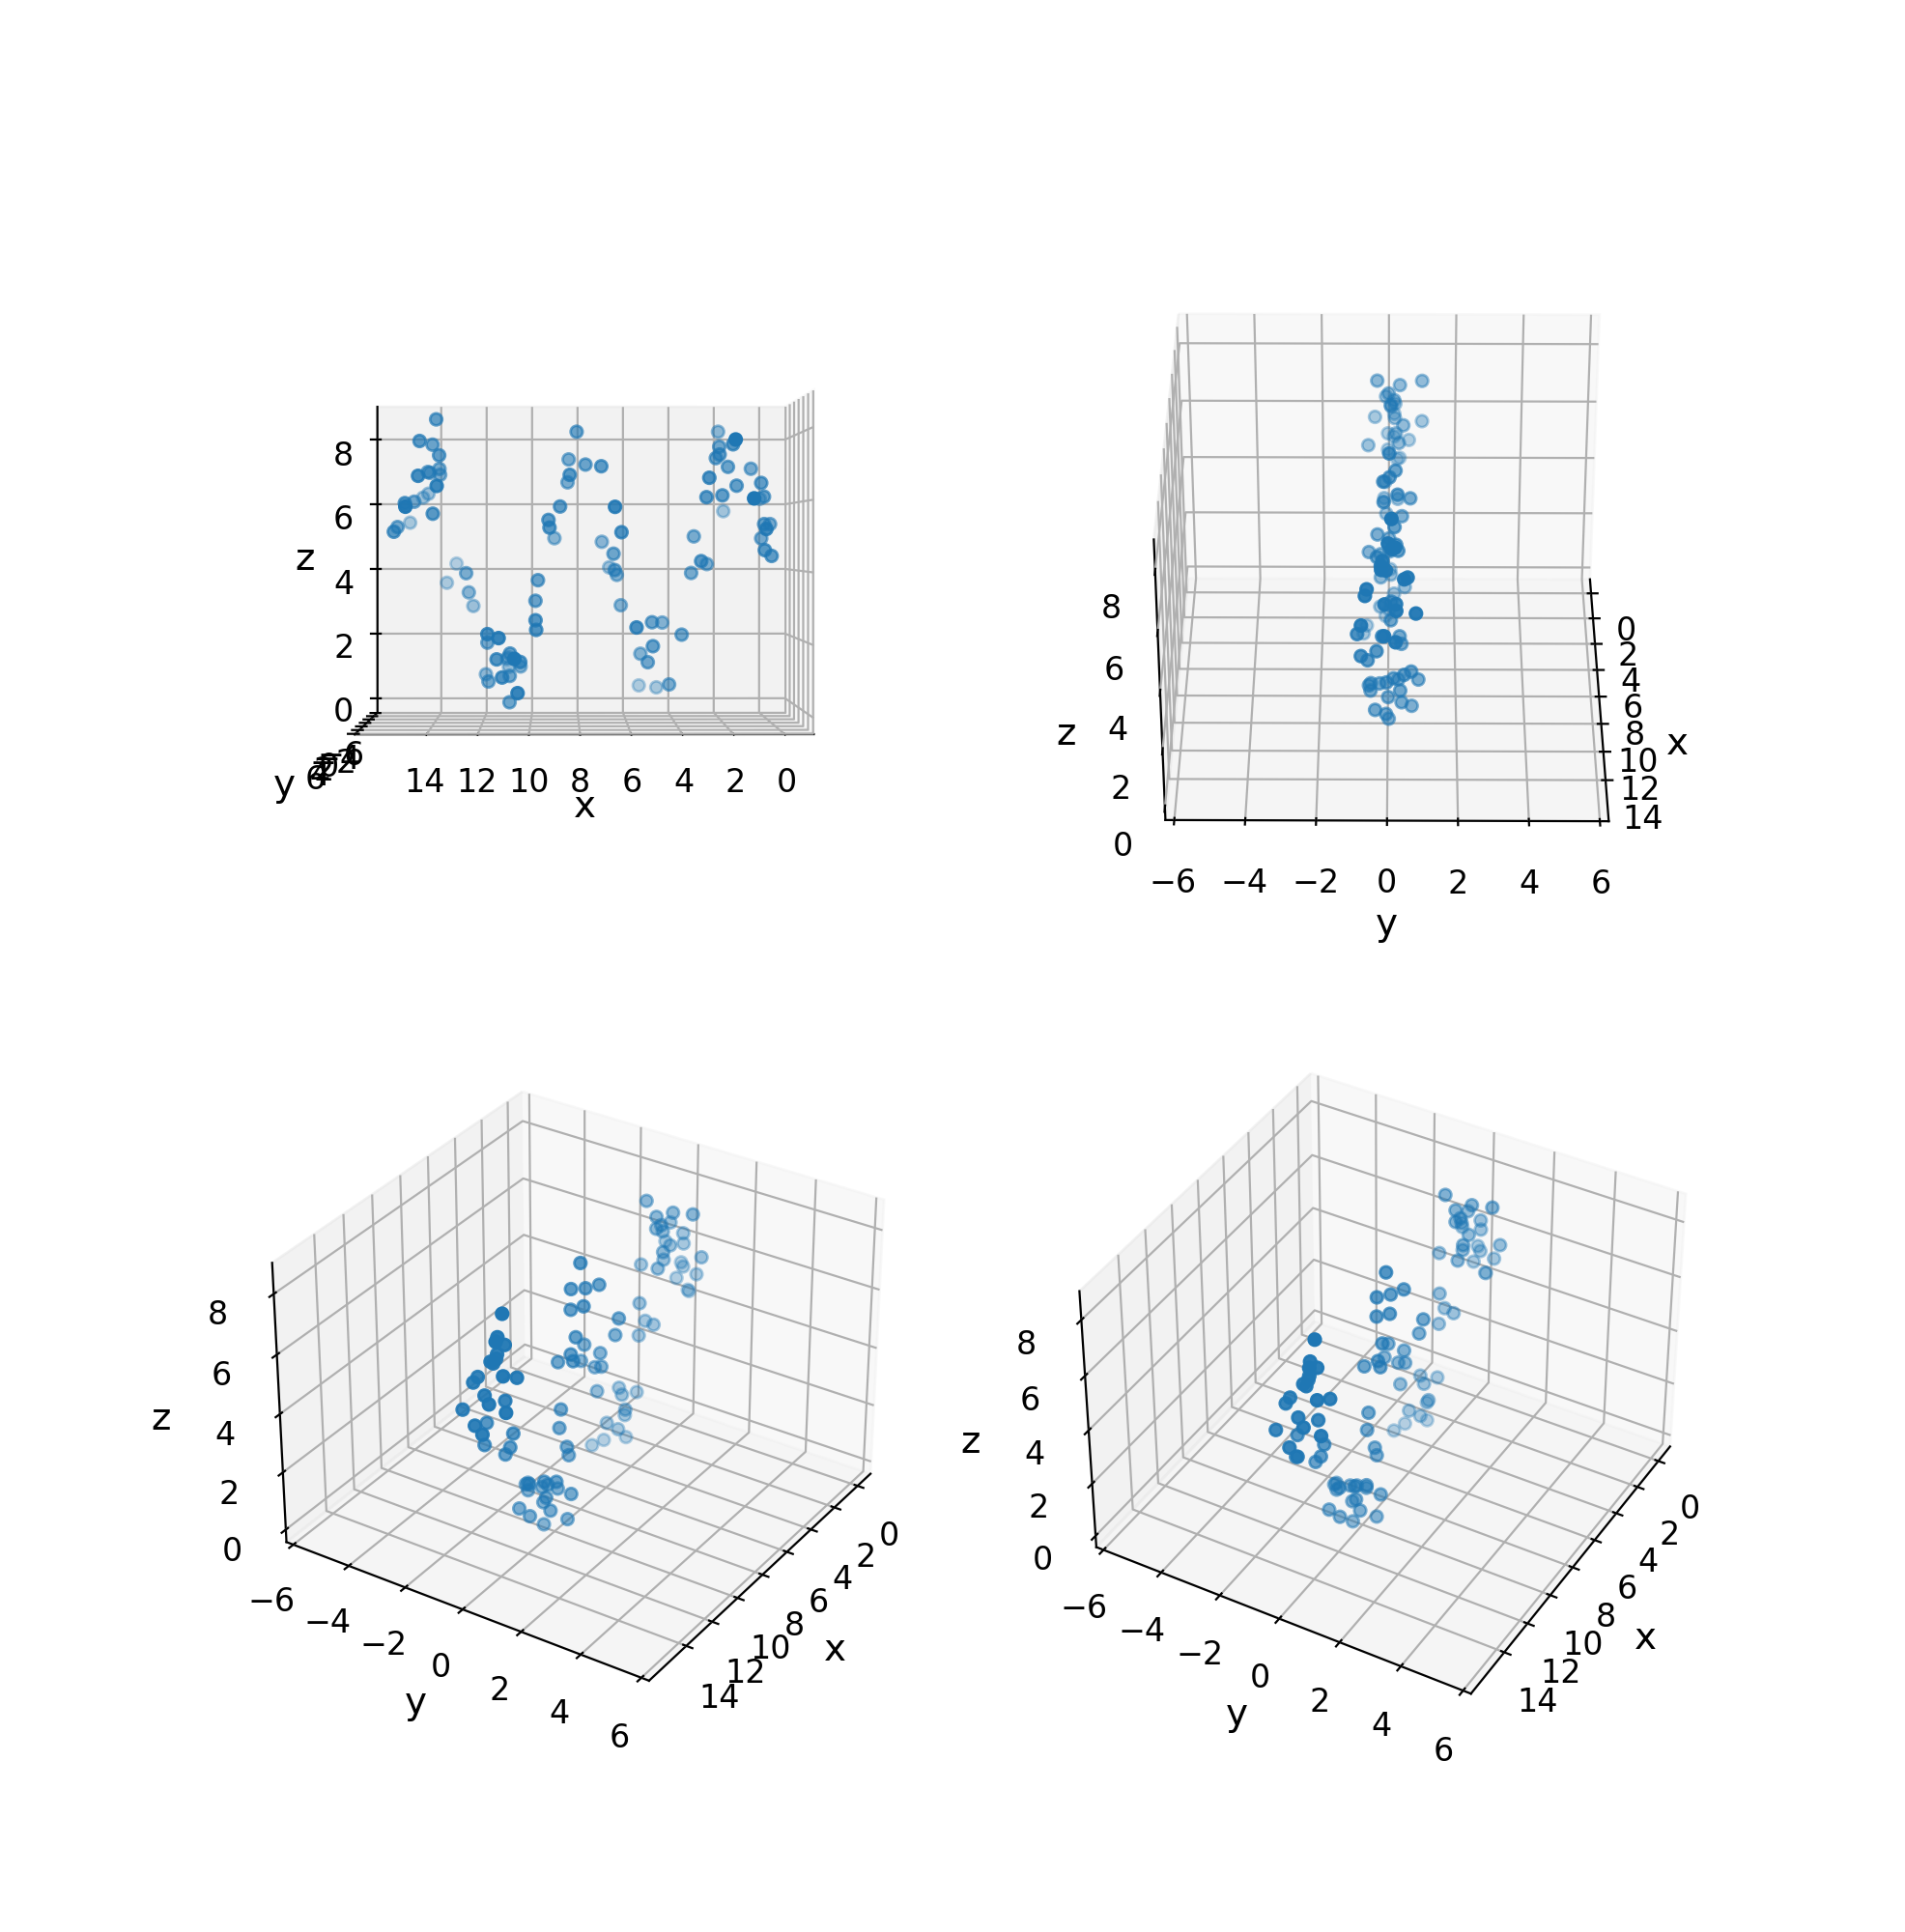

In [7]:
train_df = X_train.join(z_train)
plot3Ddata(train_df)

## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays. The Numpy arrays called fit_x and fit_y represent the x and y coordinates from the training data and fit_z represents the model predictions from those coordinates (i.e. the prediction curve). The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)

You will use the `plotscatter3Ddata()` function in each of the below __Plot Model Predictions for Training Set__ portion of the three __Explore 3D Data__ sections, as well as the __Visualize Optimal Model Predictions__ section.

___Important: Below, you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline is very ugly when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with the trendline from examining this new scatter plot of the model's predictions.___

# Explore 3D Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

 - `learning_rate = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [67]:
# changing z to (100,0) numpy array or list since model expects this
z_train = np.array(z_train).reshape(100,)
z_train.shape

(100,)

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=1, n_estimators=250, learning_rate=0.55, random_state=42)
gbrt.fit(X_train,z_train)

GradientBoostingRegressor(learning_rate=0.55, max_depth=1, n_estimators=250,
                          random_state=42)

In [70]:
#The Numpy arrays called fit_x and fit_y represent the x and y coordinates from the training data and fit_z represents the model predictions from those coordinates 
fit_z = gbrt.predict(X_train) #fit_z is our predictions
fit_x = X_train[['x']]
fit_y = X_train[['y']]


In [71]:
# fit_z needs to be a dataframe (like fit_x & fit_y) in order to sort
fit_z = pd.DataFrame(fit_z, columns=['z'])
fit_z

z
0   7.185126
1   4.187858
2   6.785067
3   4.876117
4   1.504889
..       ...
95  5.193639
96  6.544243
97  6.947486
98  1.378083
99  7.317864

[100 rows x 1 columns]

In [72]:
#dropping current indexes as rows will be resorted
fit_z.reset_index(drop=True, inplace=True)
fit_x.reset_index(drop=True, inplace=True)
fit_y.reset_index(drop=True, inplace=True)

#concat fit_x, fit_y, and fit_z into one dataframe
df1 = pd.concat([fit_z, fit_x], axis=1)
df2 = pd.concat([df1, fit_y], axis=1)
df2

z          x         y
0   7.185126   8.087852  0.036140
1   4.187858   3.211526 -0.095271
2   6.785067  13.766277 -0.181267
3   4.876117   7.035489 -0.308918
4   1.504889  10.852574  0.166125
..       ...        ...       ...
95  5.193639   0.248519  0.602740
96  6.544243   0.430203  0.195038
97  6.947486   7.067197  0.213269
98  1.378083  10.663115  0.884766
99  7.317864  13.916334  0.111231

[100 rows x 3 columns]

In [14]:
#now sorting
sorted_df = df2.sort_values(by=['x','y'], ascending=True)
sorted_df

z          x         y
82  4.621507   0.001797  0.250325
62  4.998430   0.045087 -0.024689
95  5.193639   0.248519  0.602740
47  5.062725   0.287271  0.326739
55  5.406003   0.304215  0.156513
..       ...        ...       ...
71  5.292282  15.046481 -0.726025
86  5.824199  15.155659  0.791876
81  5.804597  15.209404  0.249025
11  5.329714  15.532981 -0.081792
44  5.215319  15.665897  0.233355

[100 rows x 3 columns]

In [15]:
#changing fit_z, fit_X and fit_y to back to numpy arrays as required to use plotscatter3Ddata
fit_x = np.array(sorted_df['x']).reshape(100,)
fit_y = np.array(sorted_df['y']).reshape(100,)
fit_z = np.array(sorted_df['z']).reshape(100,)

In [16]:
#scat_x, scat_y, and  scat_z represent the x, y, and z coordinates of the training data
scat_x = np.array(X_train['x']).reshape(100,)
scat_y = np.array(X_train['y']).reshape(100,)
scat_z = np.array(z_train).reshape(100,)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

<IPython.core.display.Javascript object>


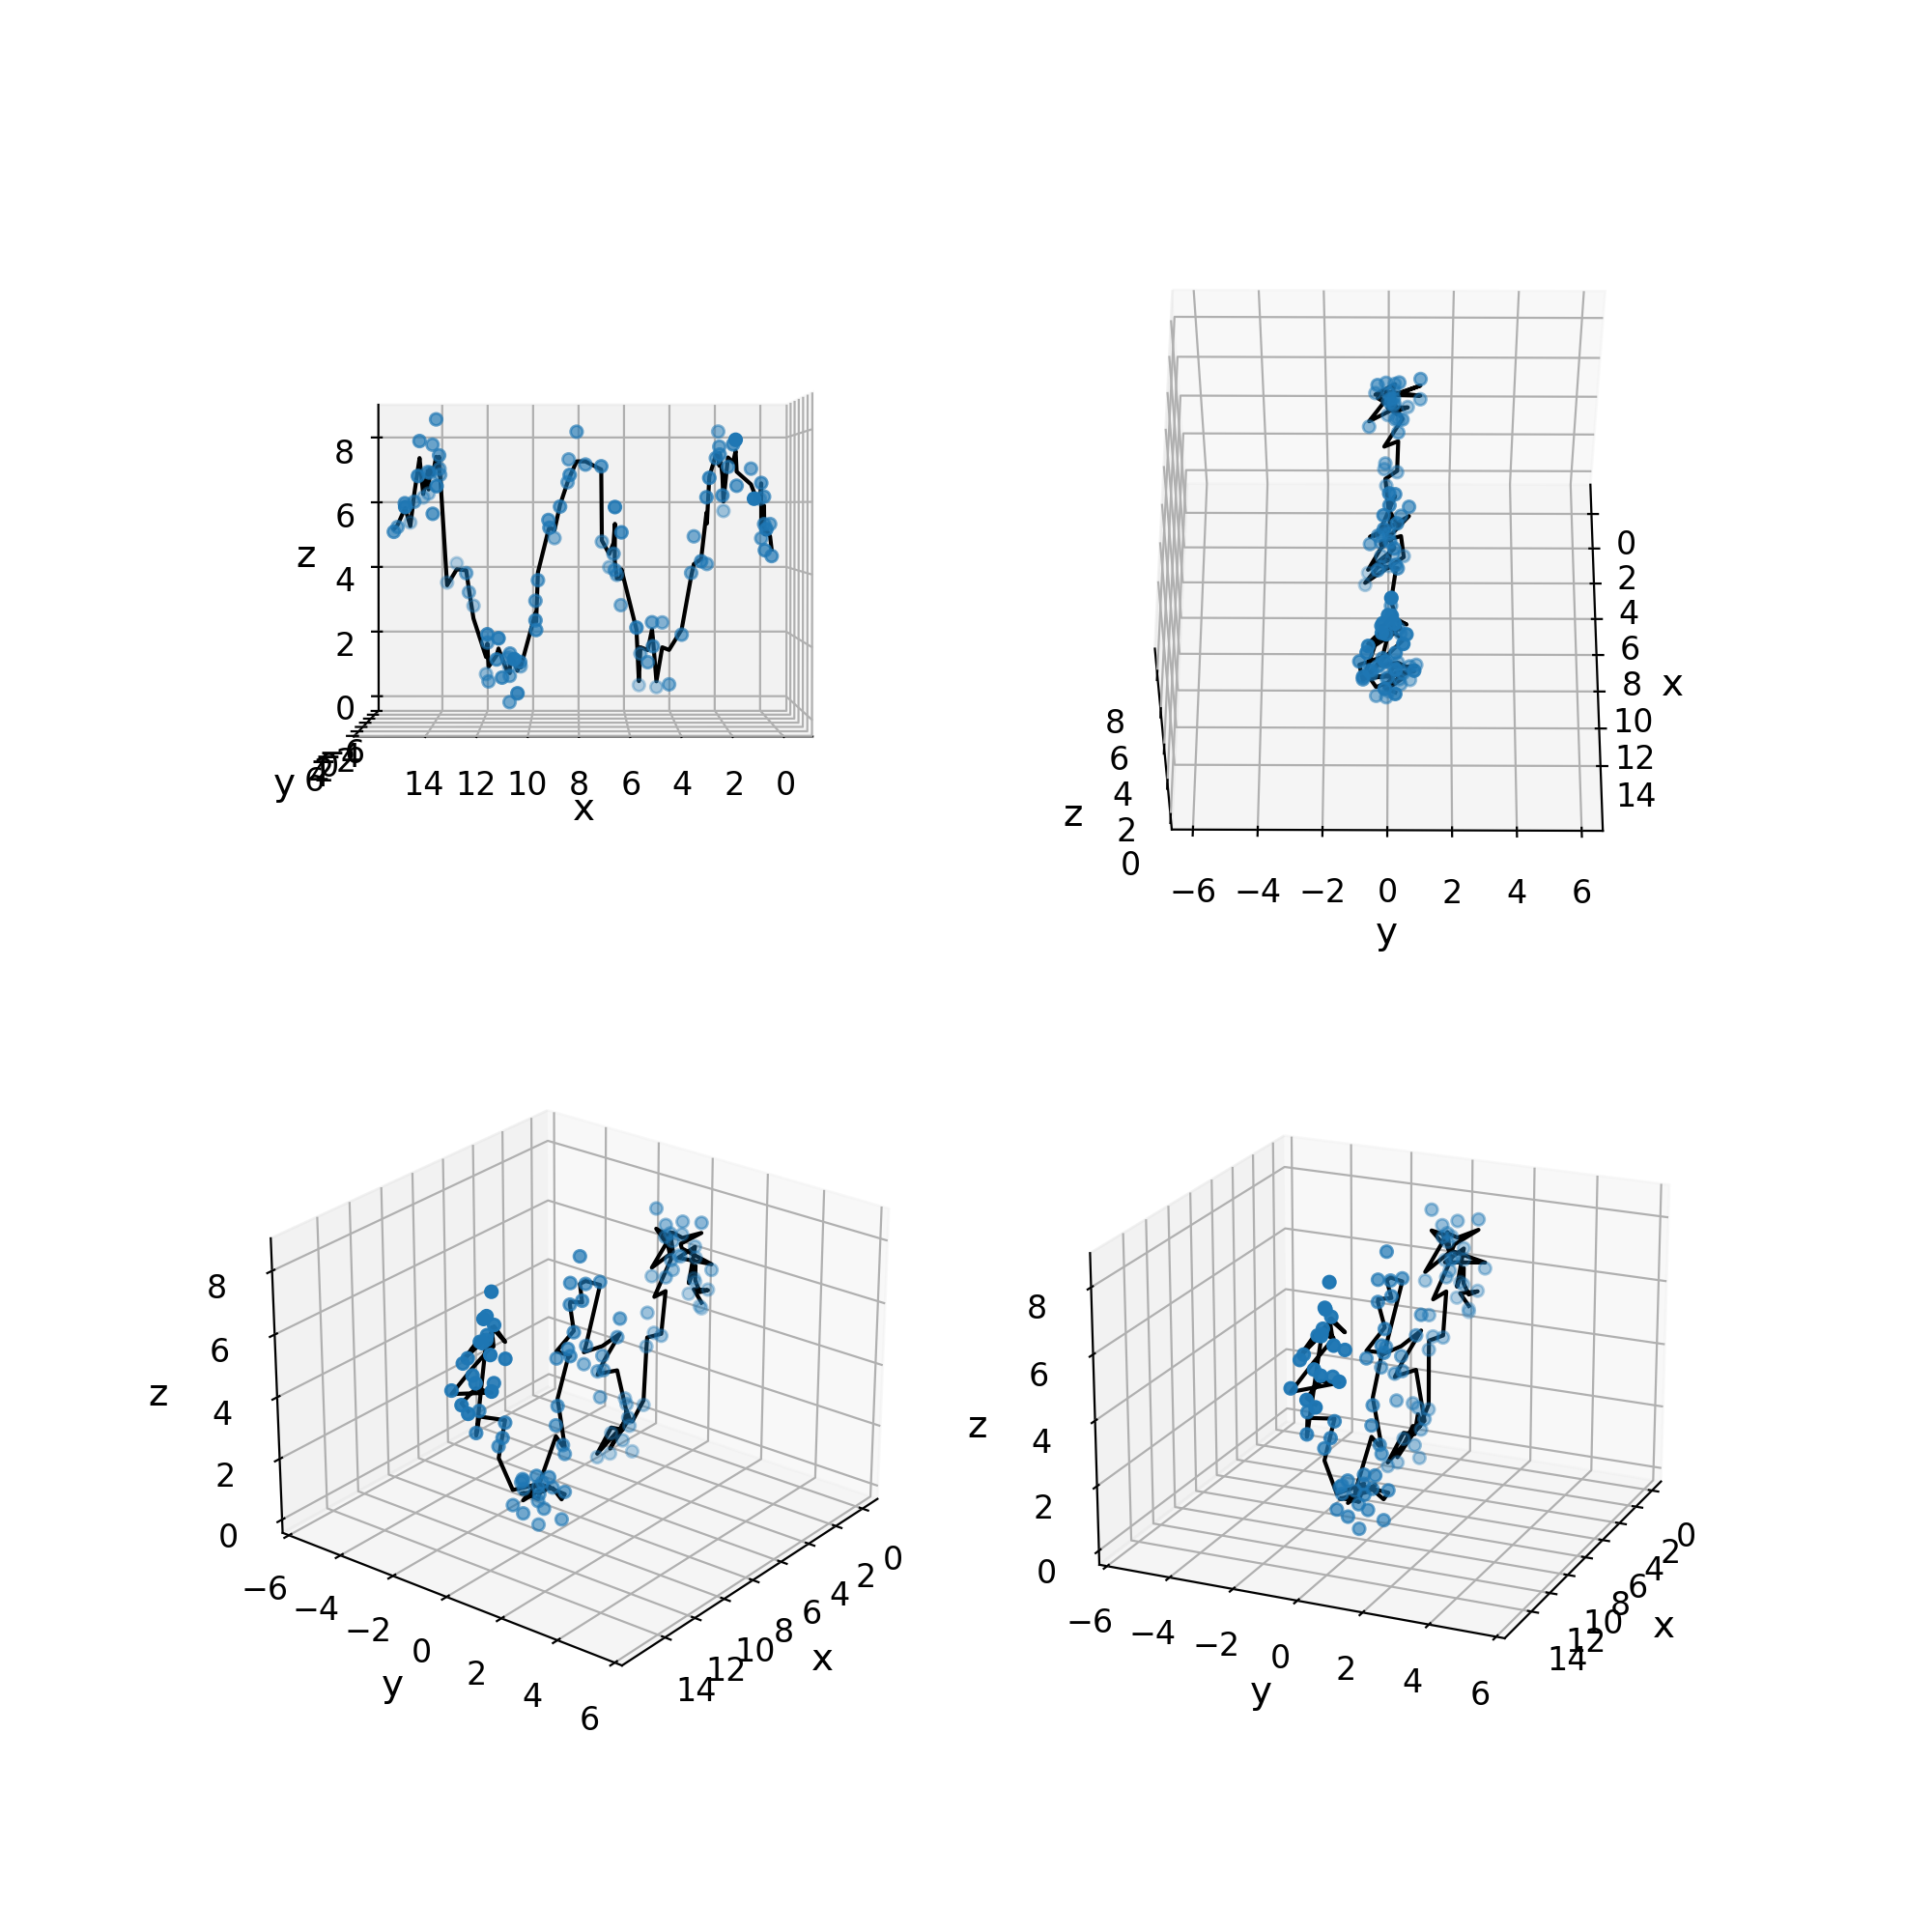

In [17]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Explore 3D Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

 - `min_samples_split = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [18]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=250
                                , min_samples_split=2, max_depth=12, random_state=42)
rnd_reg.fit(X_train, z_train)

RandomForestRegressor(max_depth=12, n_estimators=250, random_state=42)

In [73]:
#assigning fit_z to our random forest model predictions 
fit_z = rnd_reg.predict(X_train) 
fit_x = X_train[['x']]
fit_y = X_train[['y']]


# fit_z needs to be a dataframe (like fit_x & fit_y) in order to sort
fit_z = pd.DataFrame(fit_z, columns=['z'])
fit_z


#dropping current indexes as rows will be resorted
fit_z.reset_index(drop=True, inplace=True)
fit_x.reset_index(drop=True, inplace=True)
fit_y.reset_index(drop=True, inplace=True)

#concat fit_x, fit_y, and fit_z into one dataframe
df1 = pd.concat([fit_z, fit_x], axis=1)
df2 = pd.concat([df1, fit_y], axis=1)



#now sorting
sorted_df = df2.sort_values(by=['x','y'], ascending=True)
sorted_df


#changing fit_z, fit_X and fit_y to back to numpy arrays as required to use plotscatter3Ddata function
fit_x = np.array(sorted_df['x']).reshape(100,)
fit_y = np.array(sorted_df['y']).reshape(100,)
fit_z = np.array(sorted_df['z']).reshape(100,)


#scat_x, scat_y, and  scat_z represent the x, y, and z coordinates of the training data
scat_x = np.array(X_train['x']).reshape(100,)
scat_y = np.array(X_train['y']).reshape(100,)
scat_z = np.array(z_train)

In [20]:
scat_z.shape

(100,)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

<IPython.core.display.Javascript object>


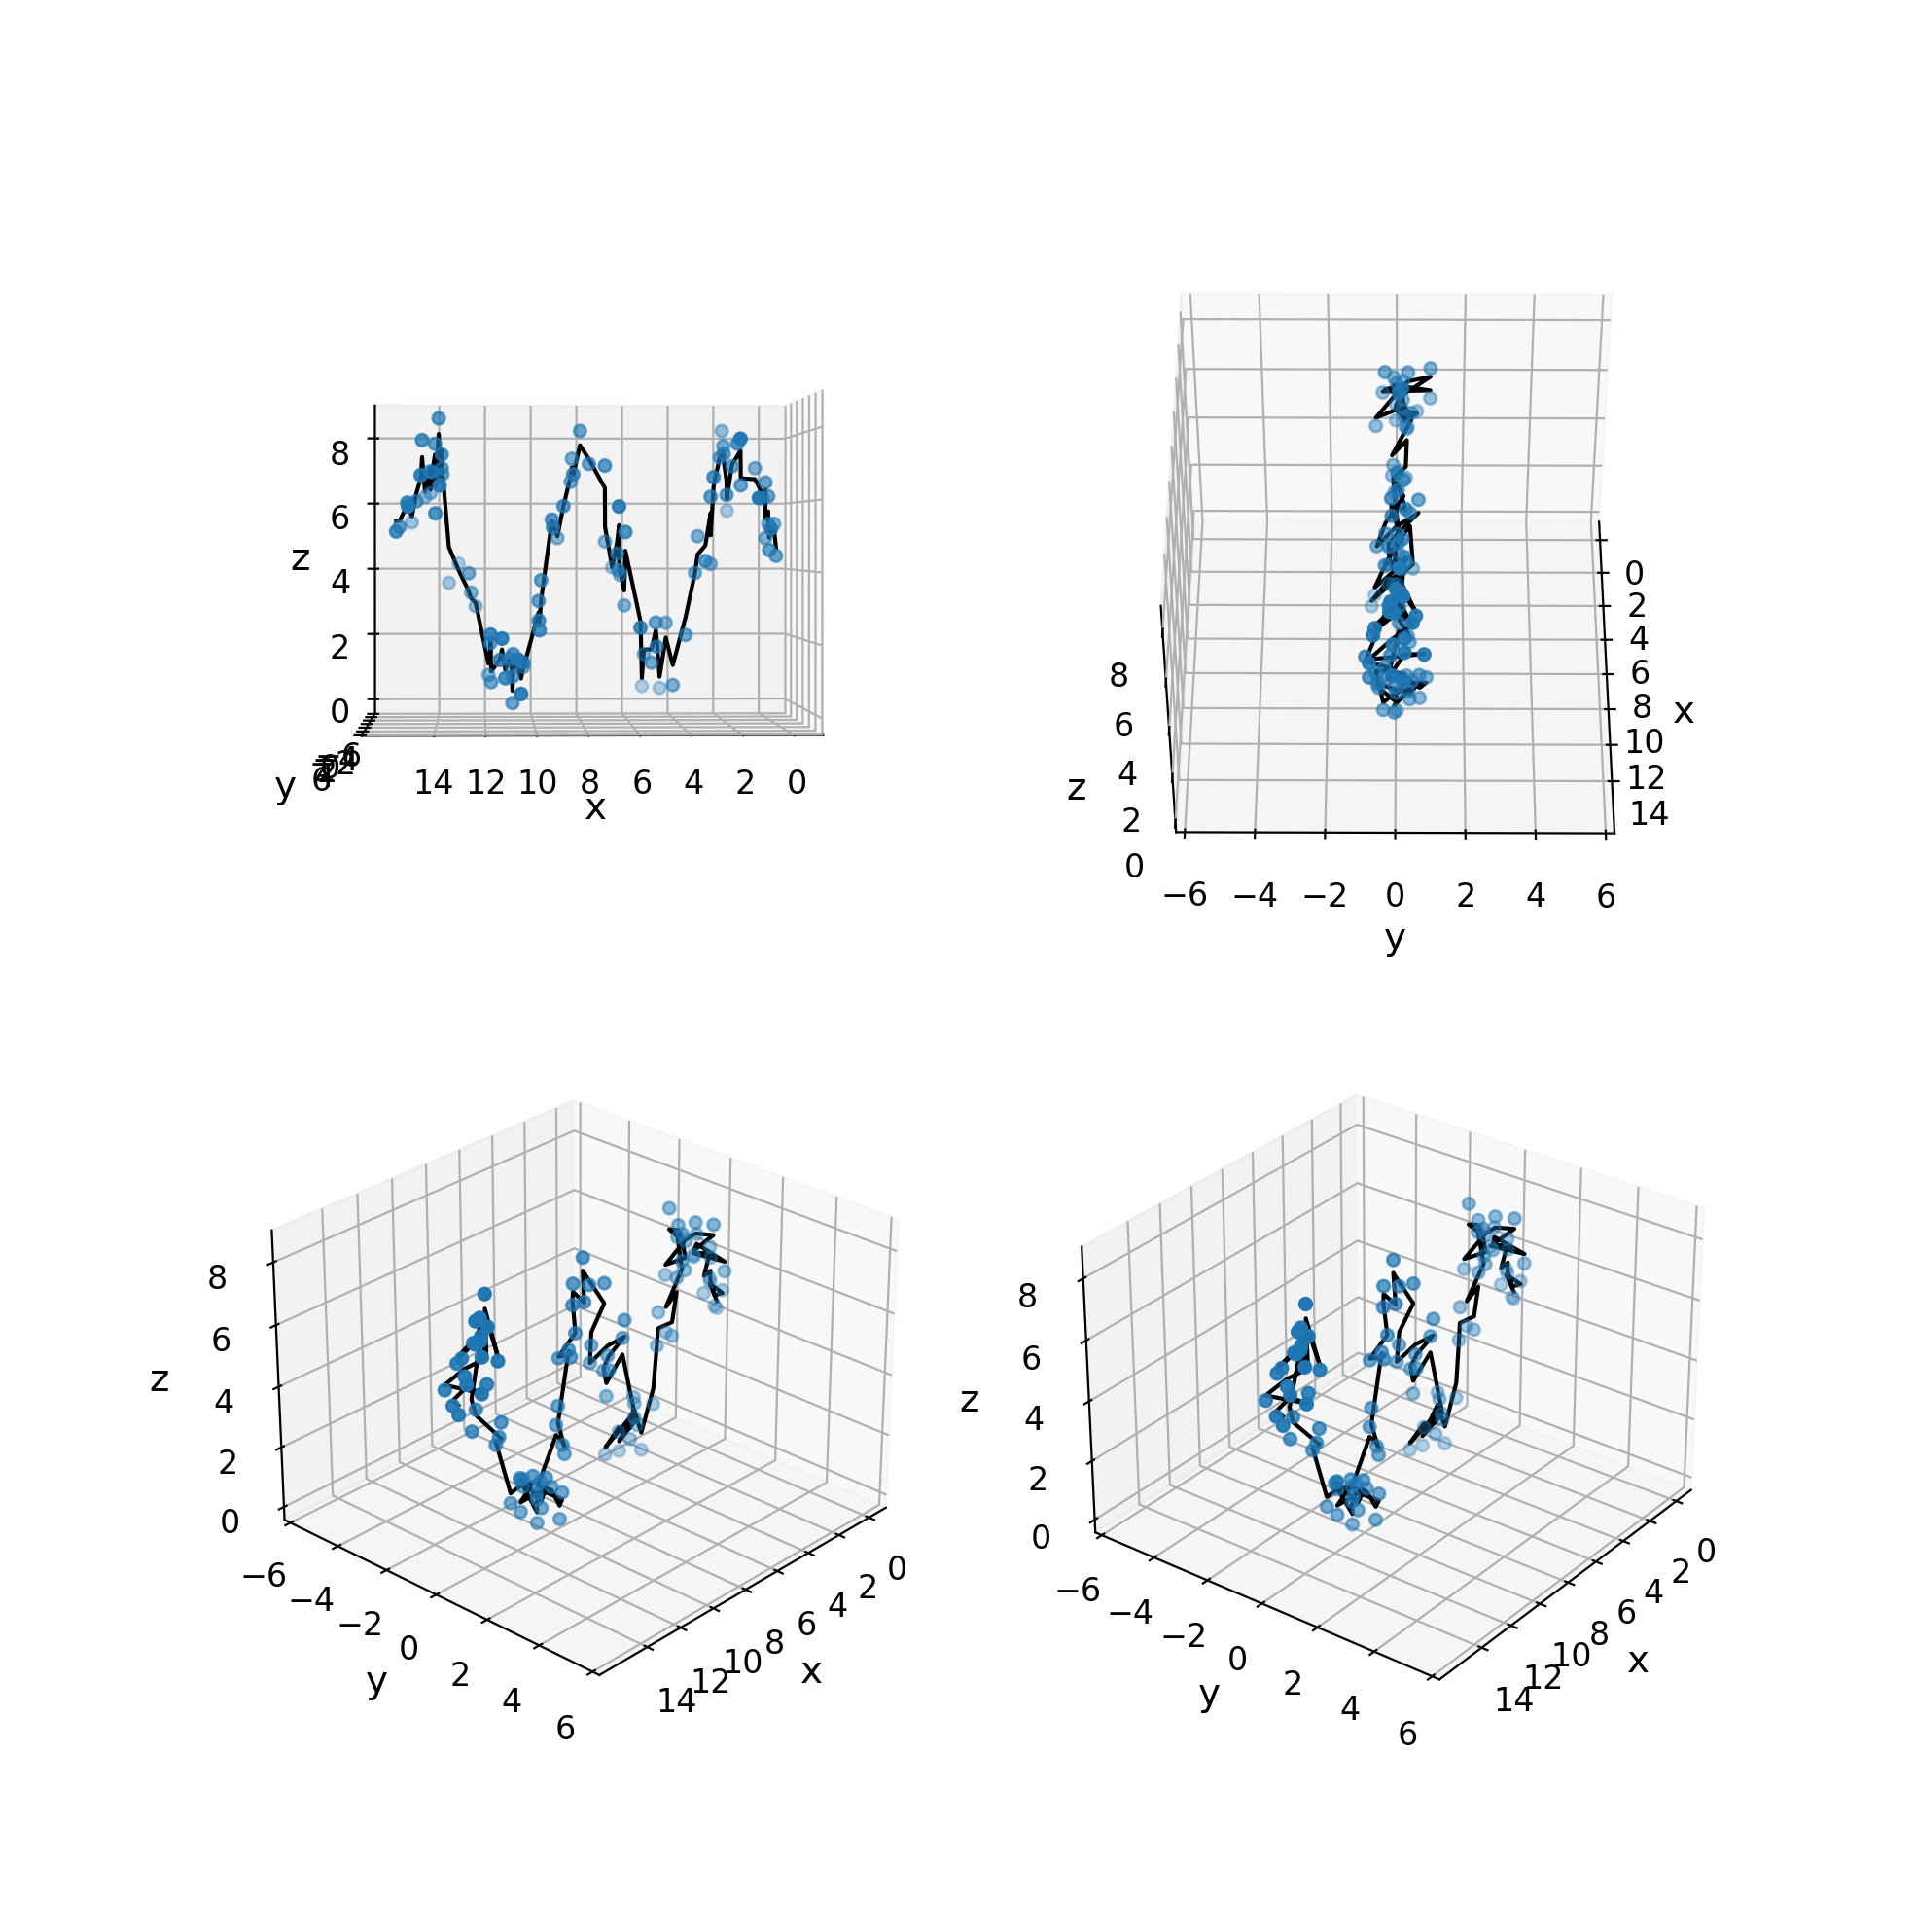

In [21]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Explore 3D Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)
 - `splitter = <value>`
 - `max_depth = <value>`
 - `min_samples_split = <value>`
 - `random_state = 42`

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(splitter='best', max_depth=7, min_samples_split=10, random_state=42)
tree_reg.fit(X_train, z_train)

DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=42)

In [74]:
#assigning fit_z to our decision tree regressor model predictions 
fit_z = tree_reg.predict(X_train) 
fit_x = X_train[['x']]
fit_y = X_train[['y']]


#changing each back to dfs
df_z = pd.DataFrame(fit_z, columns=['z'])
df_x = pd.DataFrame(fit_x)
df_y = pd.DataFrame(fit_y)




#dropping current indexes as rows will be resorted
df_z.reset_index(drop=True, inplace=True)
df_x.reset_index(drop=True, inplace=True)
df_y.reset_index(drop=True, inplace=True)

#concat fit_x, fit_y, and fit_z into one dataframe
df1 = pd.concat([df_z, df_x], axis=1)
df2 = pd.concat([df1, df_y], axis=1)


#now sorting
sorted_df = df2.sort_values(by=['x','y'], ascending=True)
sorted_df


#changing fit_z, fit_X and fit_y to back to numpy arrays as required to use plotscatter3Ddata function
fit_x = np.array(sorted_df['x']).reshape(100,)
fit_y = np.array(sorted_df['y']).reshape(100,)
fit_z = np.array(sorted_df['z']).reshape(100,)


#scat_x, scat_y, and  scat_z represent the x, y, and z coordinates of the training data
scat_x = np.array(X_train['x']).reshape(100,)
scat_y = np.array(X_train['y']).reshape(100,)
scat_z = np.array(z_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

<IPython.core.display.Javascript object>


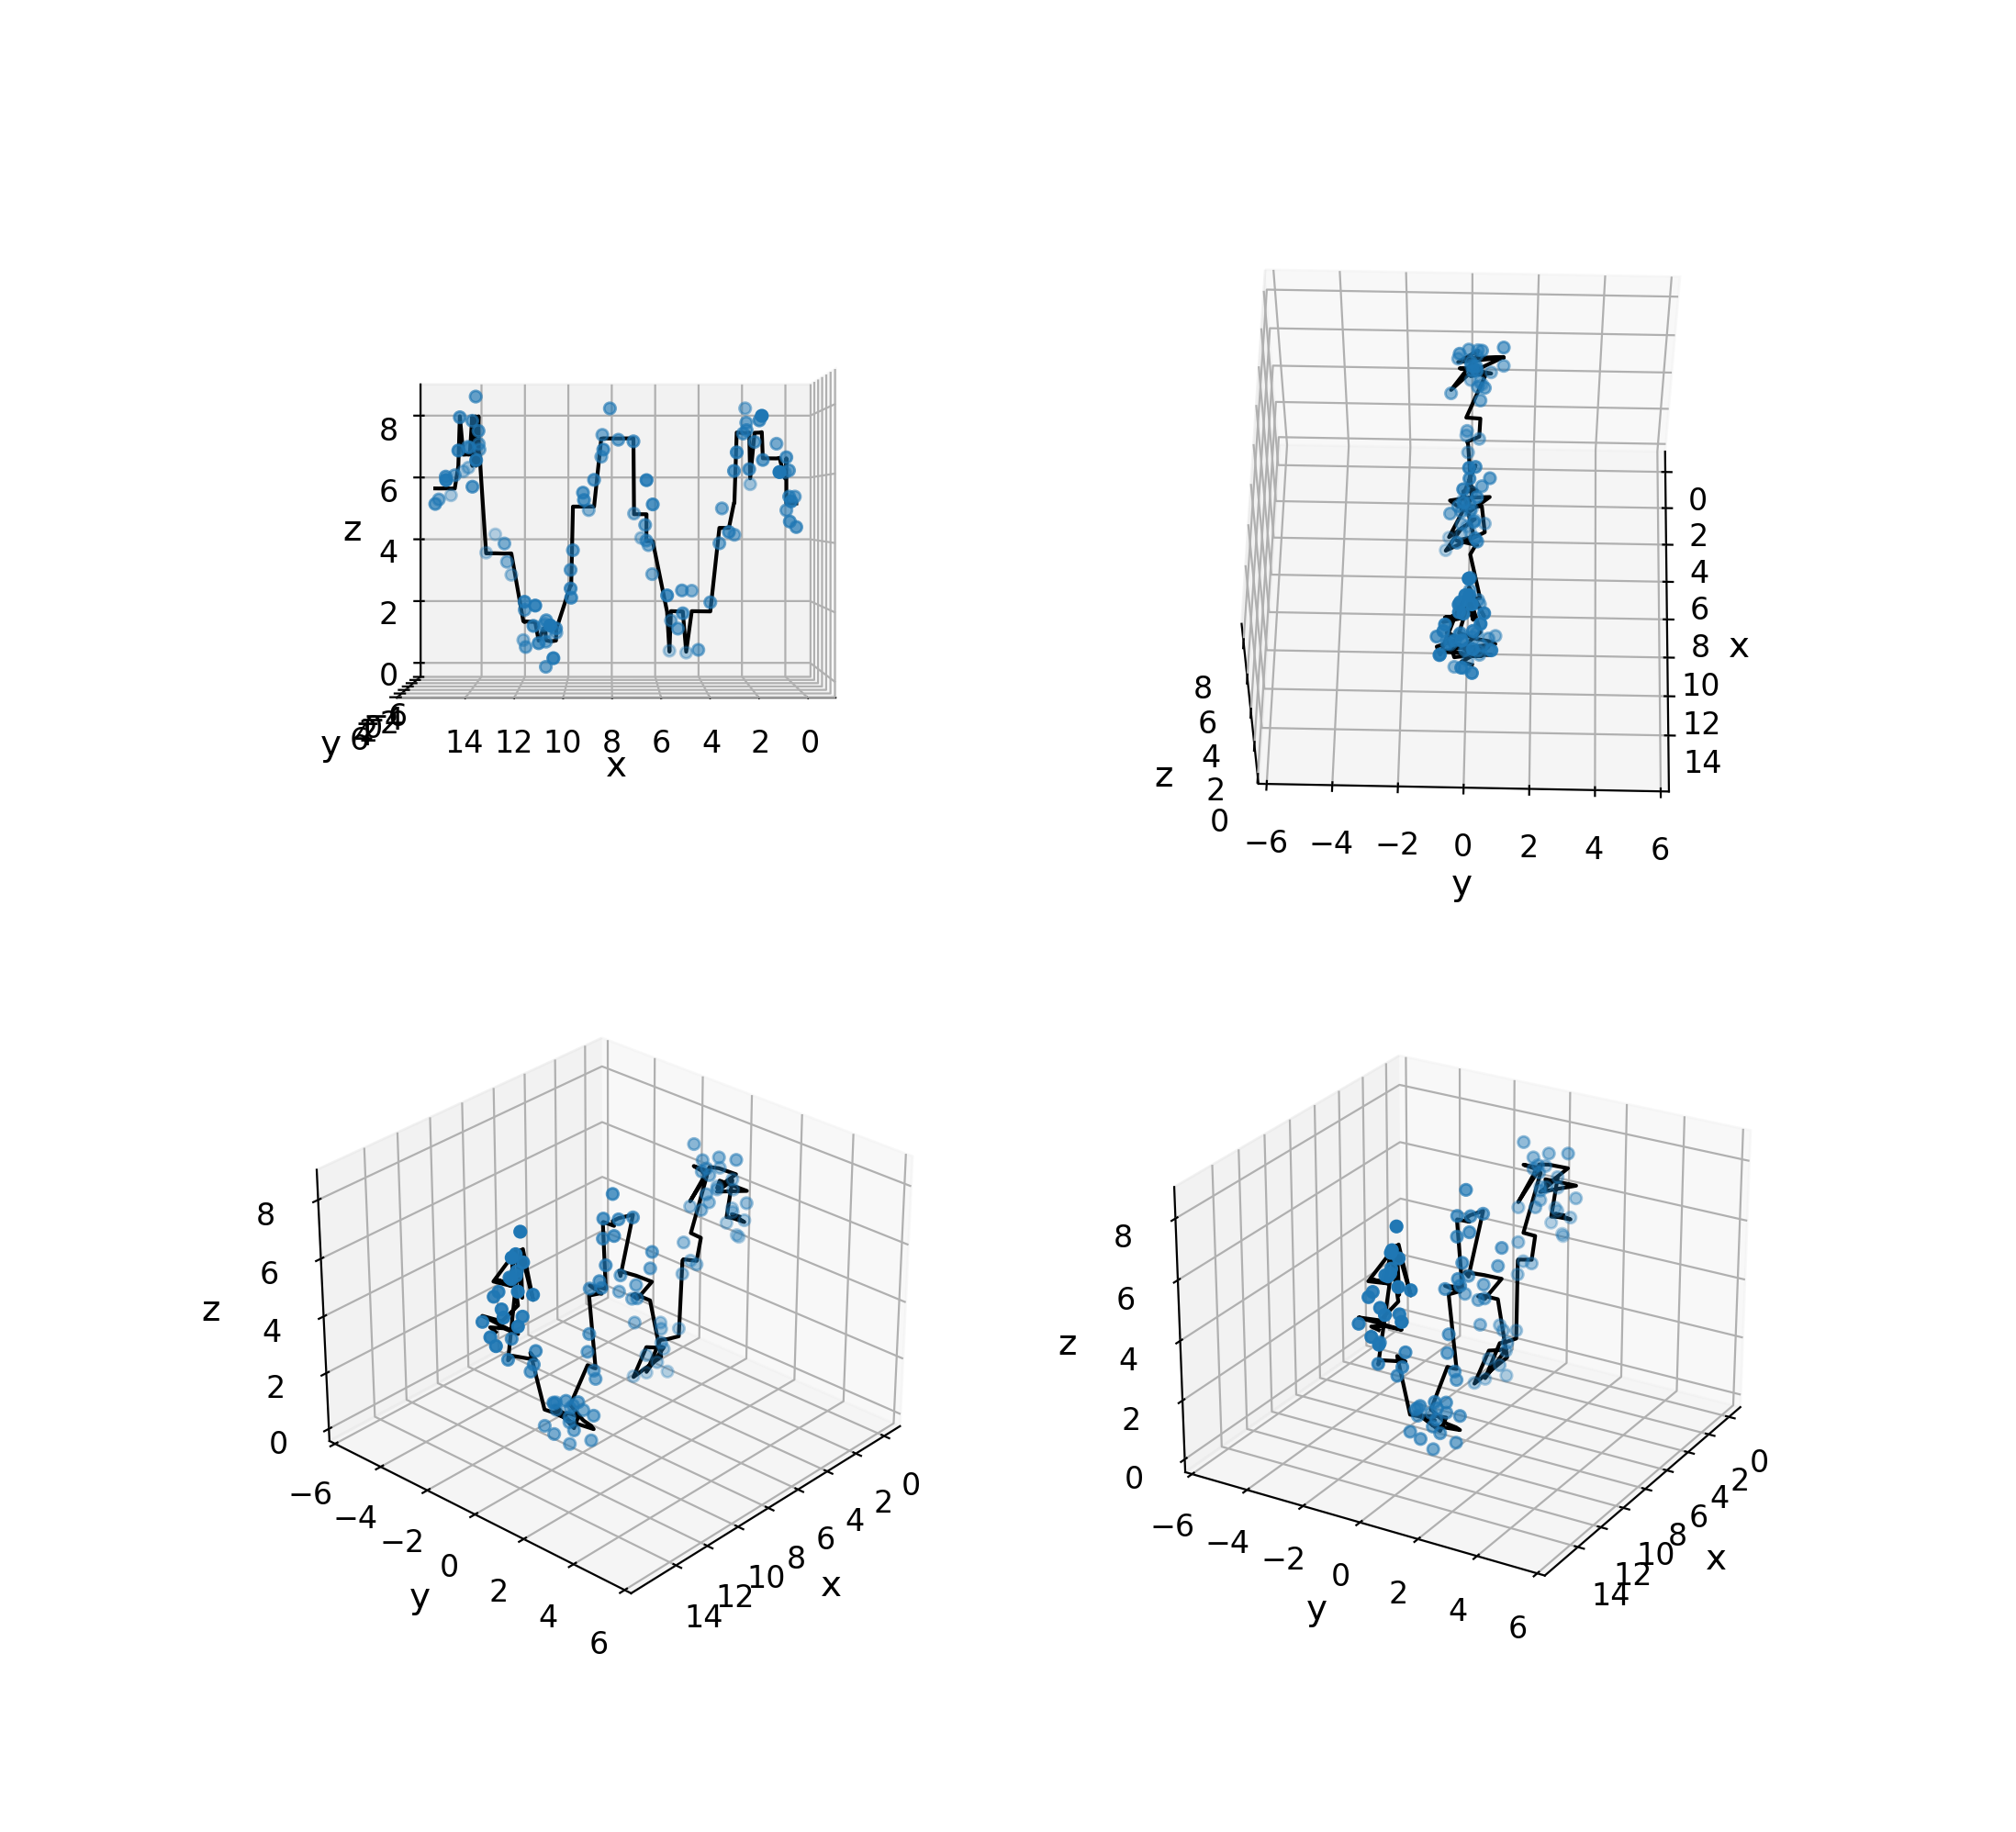

In [24]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me at least three rounds of grid searches per model to ascertain the optimal hyperparameter values below).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters:

   GradientBoostingRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `learning_rate = <value>`

   RandomForestRegressor:
    
     - `max_depth = <value>`
     - `n_estimators = <value>`
     - `min_samples_split = <value>`

   DecisionTreeRegressor:
    
     - `splitter = <value>`
     - `max_depth = <value>`
     - `min_samples_split = <value>`
     
     
4. `learning rate` should be rounded to two decimals.
5. The number of cross-folds. Specify `cv=3`


## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [56]:
from sklearn.model_selection import GridSearchCV

# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

param_grid = [

    {'max_depth': [1,2,4,6,8,16,32], 'n_estimators': [100, 250, 350, 500, 750, 800, 1000],
    'learning_rate': [.01, 0.10, 0.30, 0.50, 0.70, .80, 1]}
]

grid_search_cg = GridSearchCV(gbrt, param_grid, verbose=1, cv=3)

grid_search_cg.fit(X_train, z_train)

print("The best parameters are: ", grid_search_cg.best_params_)

Fitting 3 folds for each of 343 candidates, totalling 1029 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 250}


[Parallel(n_jobs=1)]: Done 1029 out of 1029 | elapsed:  2.9min finished


In [57]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

param_grid = [

    {'max_depth': [1,2,3], 'n_estimators': [100,150,200, 250, 300, 350],
    'learning_rate': [0.30, 0.45, 0.50 ,0.55, 0.60]}
]

grid_search_cg = GridSearchCV(gbrt, param_grid, verbose=1, cv=3)

grid_search_cg.fit(X_train, z_train)

print("The best parameters are: ", grid_search_cg.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'learning_rate': 0.55, 'max_depth': 1, 'n_estimators': 250}


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   13.6s finished


In [58]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

param_grid = [

    {'max_depth': [1], 'n_estimators': [200, 225, 250, 275],
    'learning_rate': [0.55]}
]

grid_search_cg = GridSearchCV(gbrt, param_grid, verbose=1, cv=3)

grid_search_cg.fit(X_train, z_train)

print("The best parameters are: ", grid_search_cg.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'learning_rate': 0.55, 'max_depth': 1, 'n_estimators': 250}


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.7s finished


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = .55`
- `max_depth = 1`
- `n_estimators = 250`

In [59]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

param_grid = [

    {'max_depth': [1,2,4,6,8,16,32], 'n_estimators': [100, 250, 350, 500, 750, 800, 1000],
    'min_samples_split': [2, 3, 7, 10, 15, 20]}
]

grid_search_cg = GridSearchCV(rnd_reg, param_grid, verbose=1, cv=3)

grid_search_cg.fit(X_train, z_train)

print("The best parameters are: ", grid_search_cg.best_params_)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:  8.2min finished


The best parameters are:  {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 250}


In [60]:
# -----
# Refined RandomForestRegressor GridSearch
# -----


param_grid = [

    {'max_depth': [14,15,16,17,18], 'n_estimators': [100,150,200, 250, 300, 350],
    'min_samples_split': [2, 3, 4]}
]

grid_search_cg = GridSearchCV(rnd_reg, param_grid, verbose=1, cv=3)

grid_search_cg.fit(X_train, z_train)

print("The best parameters are: ", grid_search_cg.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.0min finished


The best parameters are:  {'max_depth': 14, 'min_samples_split': 2, 'n_estimators': 250}


In [61]:
# -----
# Final RandomForestRegressor GridSearch
# -----

param_grid = [

    {'max_depth': [12,13,14,15,16], 'n_estimators': [225, 250, 275],
    'min_samples_split': [2]}
]

grid_search_cg = GridSearchCV(rnd_reg, param_grid, verbose=1, cv=3)

grid_search_cg.fit(X_train, z_train)

print("The best parameters are: ", grid_search_cg.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   12.3s finished


The best parameters are:  {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 250}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = 12`
- `n_estimators = 250`
- `min_samples_split = 2`

In [62]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

param_grid = [

    {'max_depth': [1,2,4,6,8,16,32], 'splitter' : ["best", "random"],
    'min_samples_split': [2, 3, 7, 10, 15, 20]}
]

grid_search_cg = GridSearchCV(tree_reg, param_grid, verbose=1, cv=3)

grid_search_cg.fit(X_train, z_train)

print("The best parameters are: ", grid_search_cg.best_params_)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 8, 'min_samples_split': 10, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:    1.1s finished


In [63]:
# -----
# Final-Grained DecisionTreeRegressor GridSearch
# -----

param_grid = [

    {'max_depth': [5,6,7,8,9,10,11], 'splitter' : ["best", "random"],
    'min_samples_split': [8,9, 10,11,12]}
]

grid_search_cg = GridSearchCV(tree_reg, param_grid, verbose=1, cv=3)

grid_search_cg.fit(X_train, z_train)

print("The best parameters are: ", grid_search_cg.best_params_)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 7, 'min_samples_split': 10, 'splitter': 'best'}


[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    0.9s finished


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `splitter = best`
- `max_depth = 7`
- `min_samples_split = 10`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.

### Create Optimal GradientBoostingRegressor Model

In [25]:
# used best params as defined above
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=1, n_estimators=250, learning_rate=.55, random_state=42)
gbrt.fit(X_train,z_train)

GradientBoostingRegressor(learning_rate=0.55, max_depth=1, n_estimators=250,
                          random_state=42)

In [75]:
fit_z = gbrt.predict(X_train) #fit_z is our predictions
fit_x = X_train[['x']]
fit_y = X_train[['y']]


#changing each back to dfs
df_z = pd.DataFrame(fit_z, columns=['z'])
df_x = pd.DataFrame(fit_x)
df_y = pd.DataFrame(fit_y)




#dropping current indexes as rows will be resorted
df_z.reset_index(drop=True, inplace=True)
df_x.reset_index(drop=True, inplace=True)
df_y.reset_index(drop=True, inplace=True)

#concat fit_x, fit_y, and fit_z into one dataframe
df1 = pd.concat([df_z, df_x], axis=1)
df2 = pd.concat([df1, df_y], axis=1)


#now sorting
sorted_df = df2.sort_values(by=['x','y'], ascending=True)
sorted_df


#changing fit_z, fit_X and fit_y to back to numpy arrays as required to use plotscatter3Ddata function
fit_x = np.array(sorted_df['x']).reshape(100,)
fit_y = np.array(sorted_df['y']).reshape(100,)
fit_z = np.array(sorted_df['z']).reshape(100,)


#scat_x, scat_y, and  scat_z represent the x, y, and z coordinates of the training data
scat_x = np.array(X_train['x']).reshape(100,)
scat_y = np.array(X_train['y']).reshape(100,)
scat_z = np.array(z_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

<IPython.core.display.Javascript object>


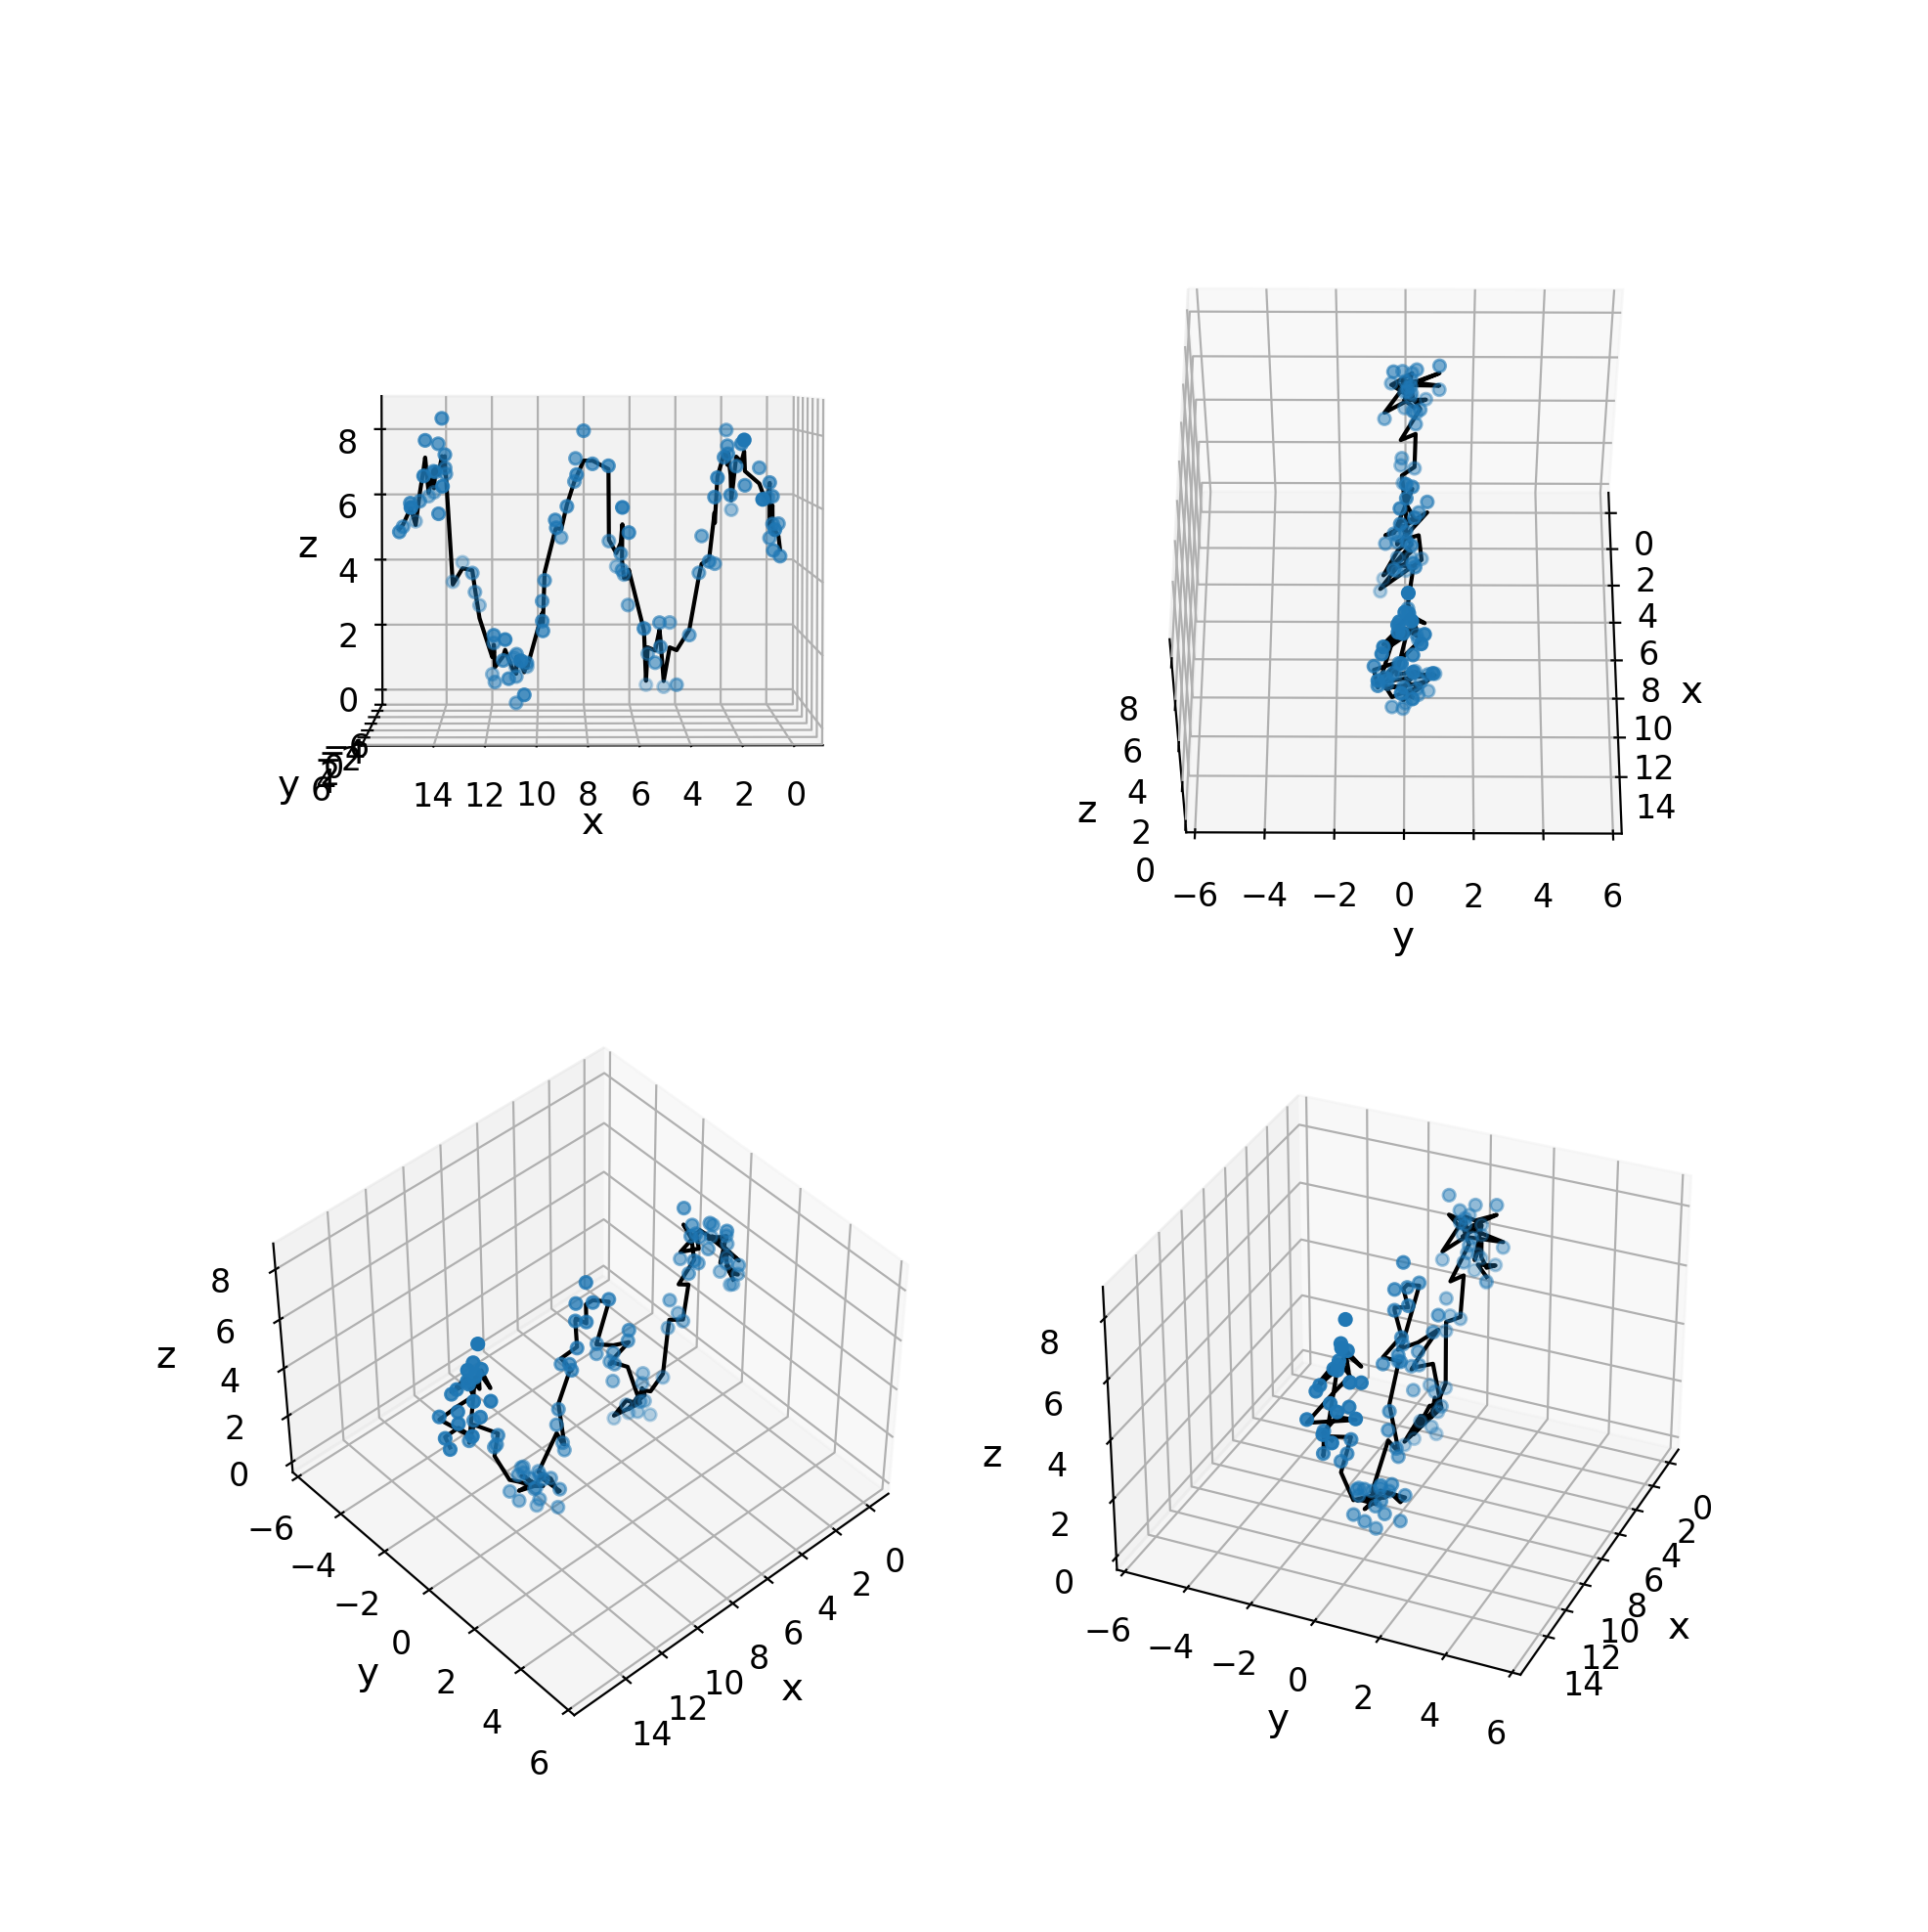

In [27]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

### Create Optimal RandomForestRegressor Model

In [28]:
# used best params as defined above
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=250
                                , min_samples_split=2, max_depth=12, random_state=42)
rnd_reg.fit(X_train, z_train)

RandomForestRegressor(max_depth=12, n_estimators=250, random_state=42)

In [76]:
#assigning fit_z to our random forest model predictions 
fit_z = rnd_reg.predict(X_train)  
fit_x = X_train[['x']]
fit_y = X_train[['y']]


#changing each back to dfs
df_z = pd.DataFrame(fit_z, columns=['z'])
df_x = pd.DataFrame(fit_x)
df_y = pd.DataFrame(fit_y)




#dropping current indexes as rows will be resorted
df_z.reset_index(drop=True, inplace=True)
df_x.reset_index(drop=True, inplace=True)
df_y.reset_index(drop=True, inplace=True)

#concat fit_x, fit_y, and fit_z into one dataframe
df1 = pd.concat([df_z, df_x], axis=1)
df2 = pd.concat([df1, df_y], axis=1)


#now sorting
sorted_df = df2.sort_values(by=['x','y'], ascending=True)
sorted_df


#changing fit_z, fit_X and fit_y to back to numpy arrays as required to use plotscatter3Ddata function
fit_x = np.array(sorted_df['x']).reshape(100,)
fit_y = np.array(sorted_df['y']).reshape(100,)
fit_z = np.array(sorted_df['z']).reshape(100,)


#scat_x, scat_y, and  scat_z represent the x, y, and z coordinates of the training data
scat_x = np.array(X_train['x']).reshape(100,)
scat_y = np.array(X_train['y']).reshape(100,)
scat_z = np.array(z_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

<IPython.core.display.Javascript object>


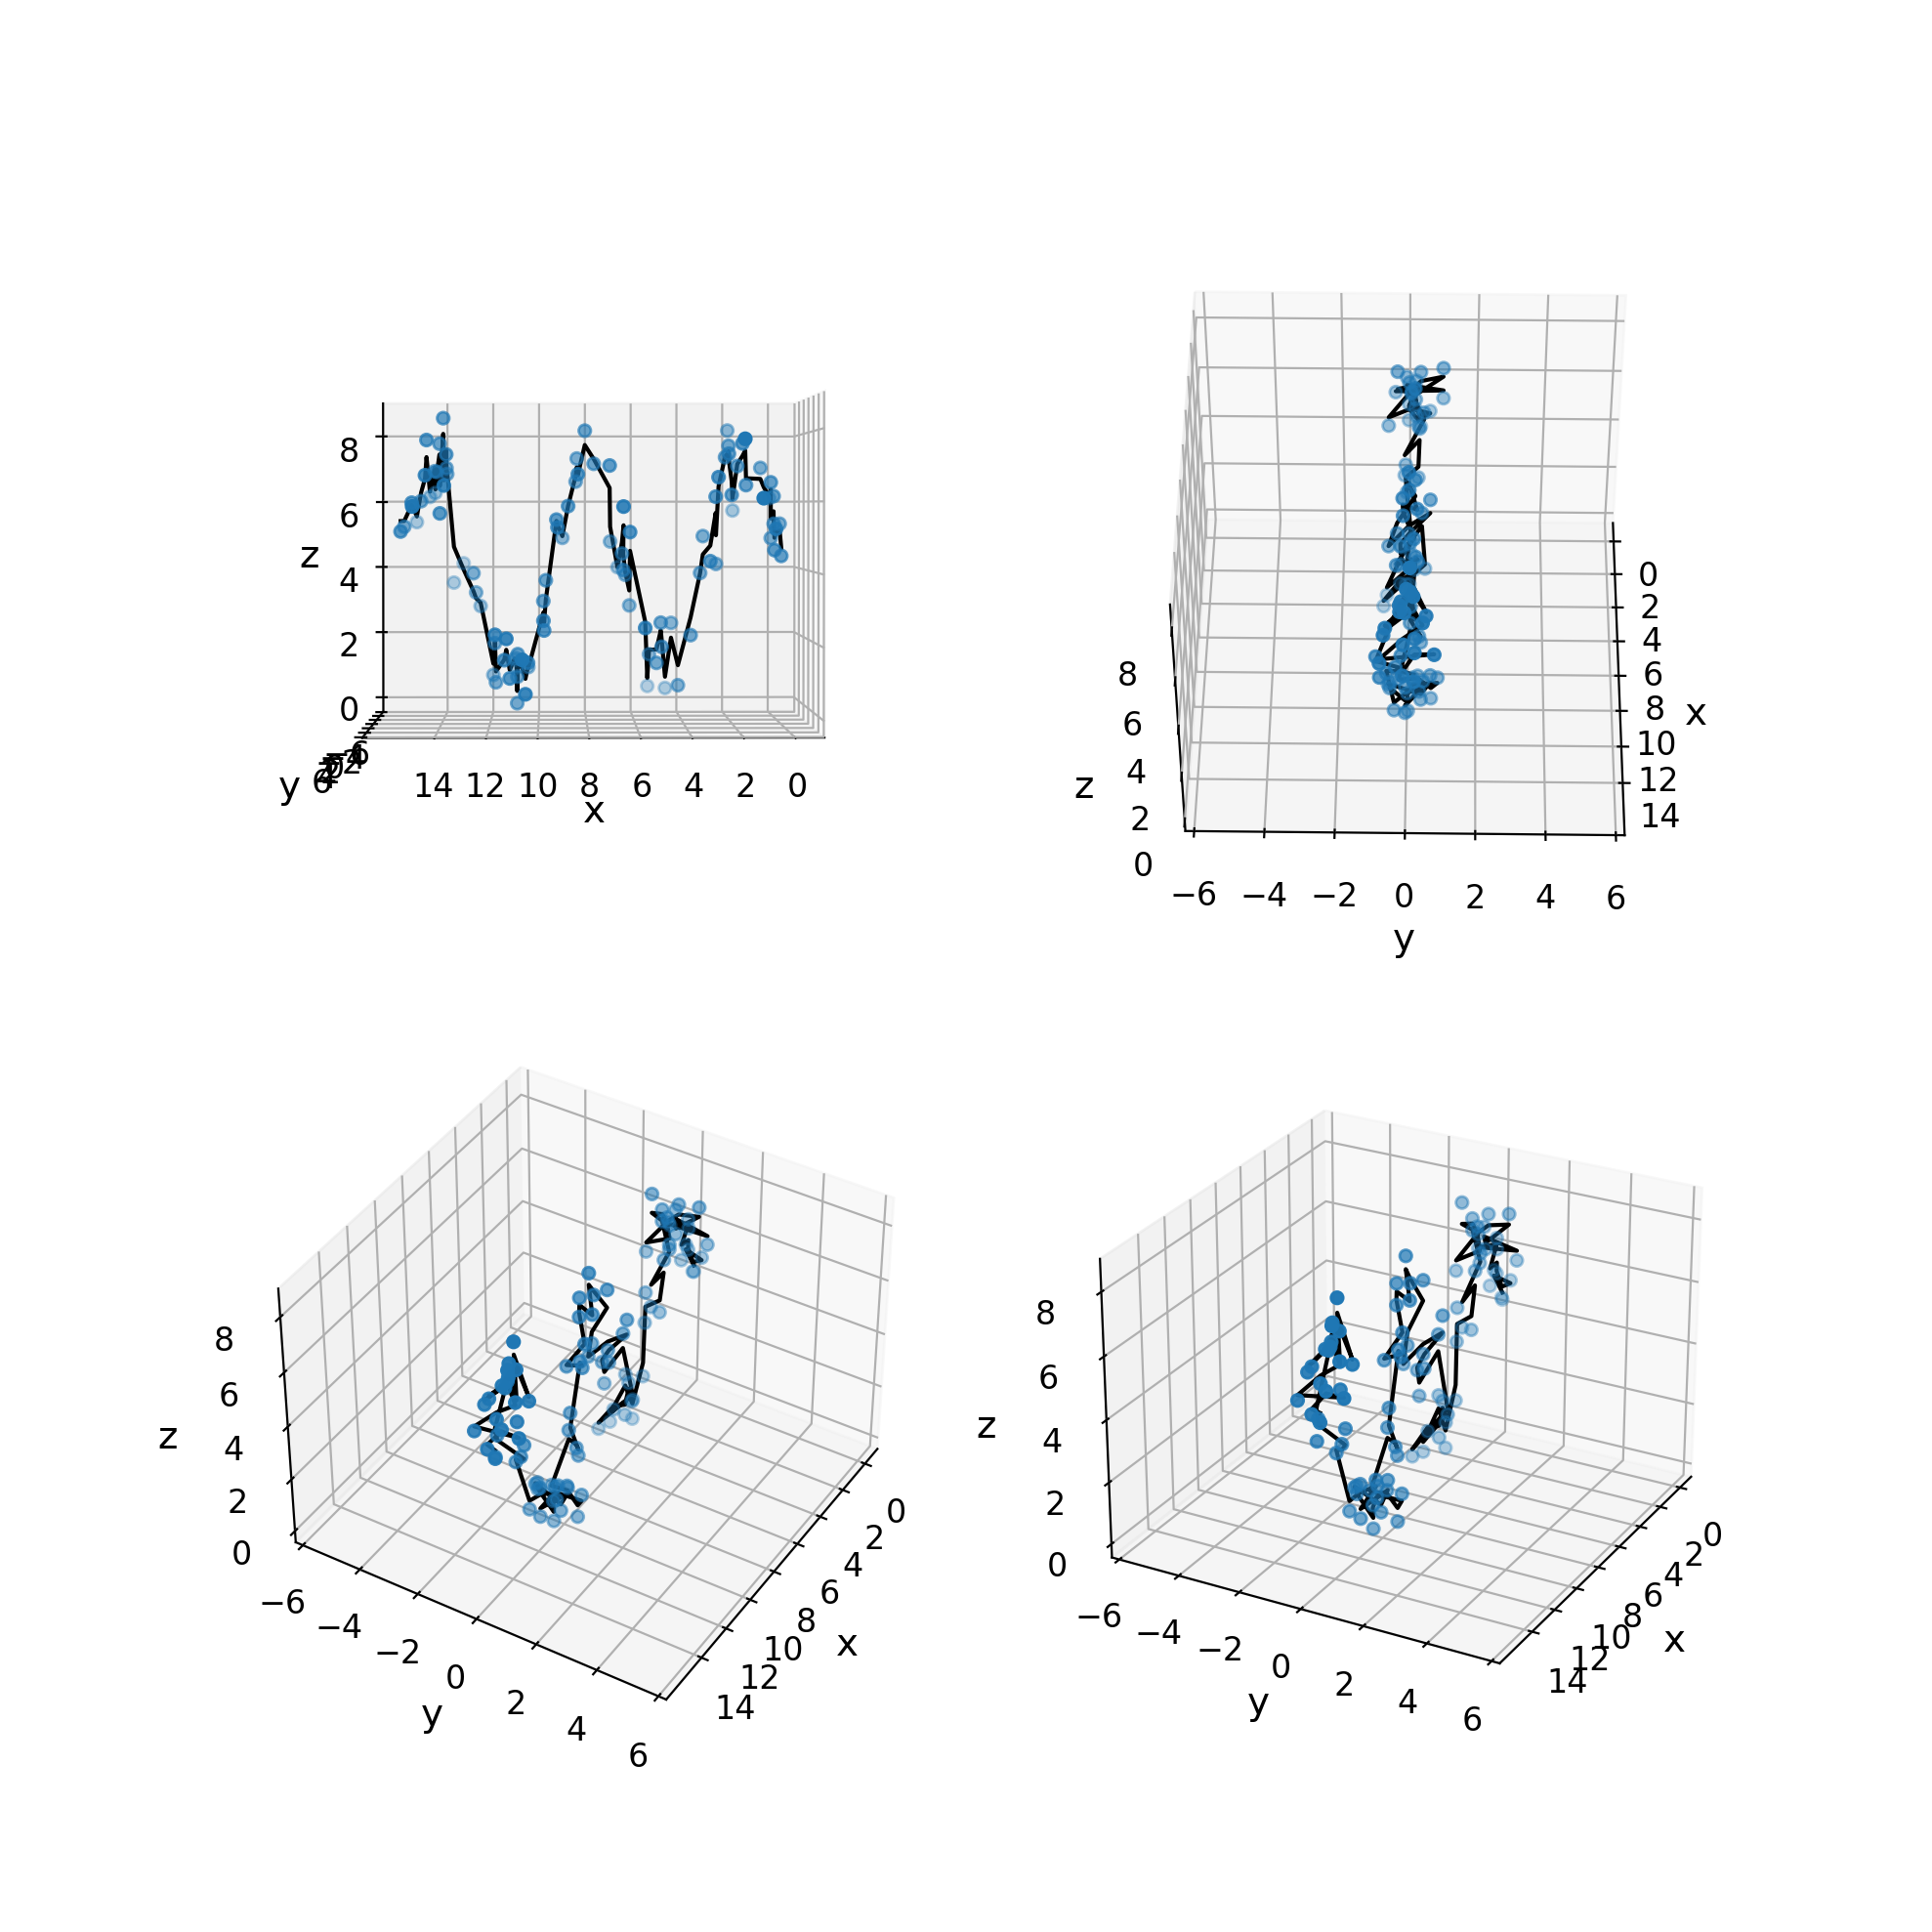

In [30]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

### Create Optimal DecisionTreeRegressor Model

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(splitter='best', max_depth=7, min_samples_split=10, random_state=42)
tree_reg.fit(X_train, z_train)


DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=42)

In [77]:
fit_z = tree_reg.predict(X_train) 
fit_x = X_train[['x']]
fit_y = X_train[['y']]


#changing each back to dfs
df_z = pd.DataFrame(fit_z, columns=['z'])
df_x = pd.DataFrame(fit_x)
df_y = pd.DataFrame(fit_y)




#dropping current indexes as rows will be resorted
df_z.reset_index(drop=True, inplace=True)
df_x.reset_index(drop=True, inplace=True)
df_y.reset_index(drop=True, inplace=True)

#concat fit_x, fit_y, and fit_z into one dataframe
df1 = pd.concat([df_z, df_x], axis=1)
df2 = pd.concat([df1, df_y], axis=1)

#now sorting
sorted_df = DF2.sort_values(by=['x','y'], ascending=True)
sorted_df


#changing fit_z, fit_X and fit_y to back to numpy arrays as required to use plotscatter3Ddata function
fit_x = np.array(sorted_df['x']).reshape(100,)
fit_y = np.array(sorted_df['y']).reshape(100,)
fit_z = np.array(sorted_df['z']).reshape(100,)


#scat_x, scat_y, and  scat_z represent the x, y, and z coordinates of the training data
scat_x = np.array(X_train['x']).reshape(100,)
scat_y = np.array(X_train['y']).reshape(100,)
scat_z = np.array(z_train)

### Plot Model Predictions for Training Set

Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

<IPython.core.display.Javascript object>


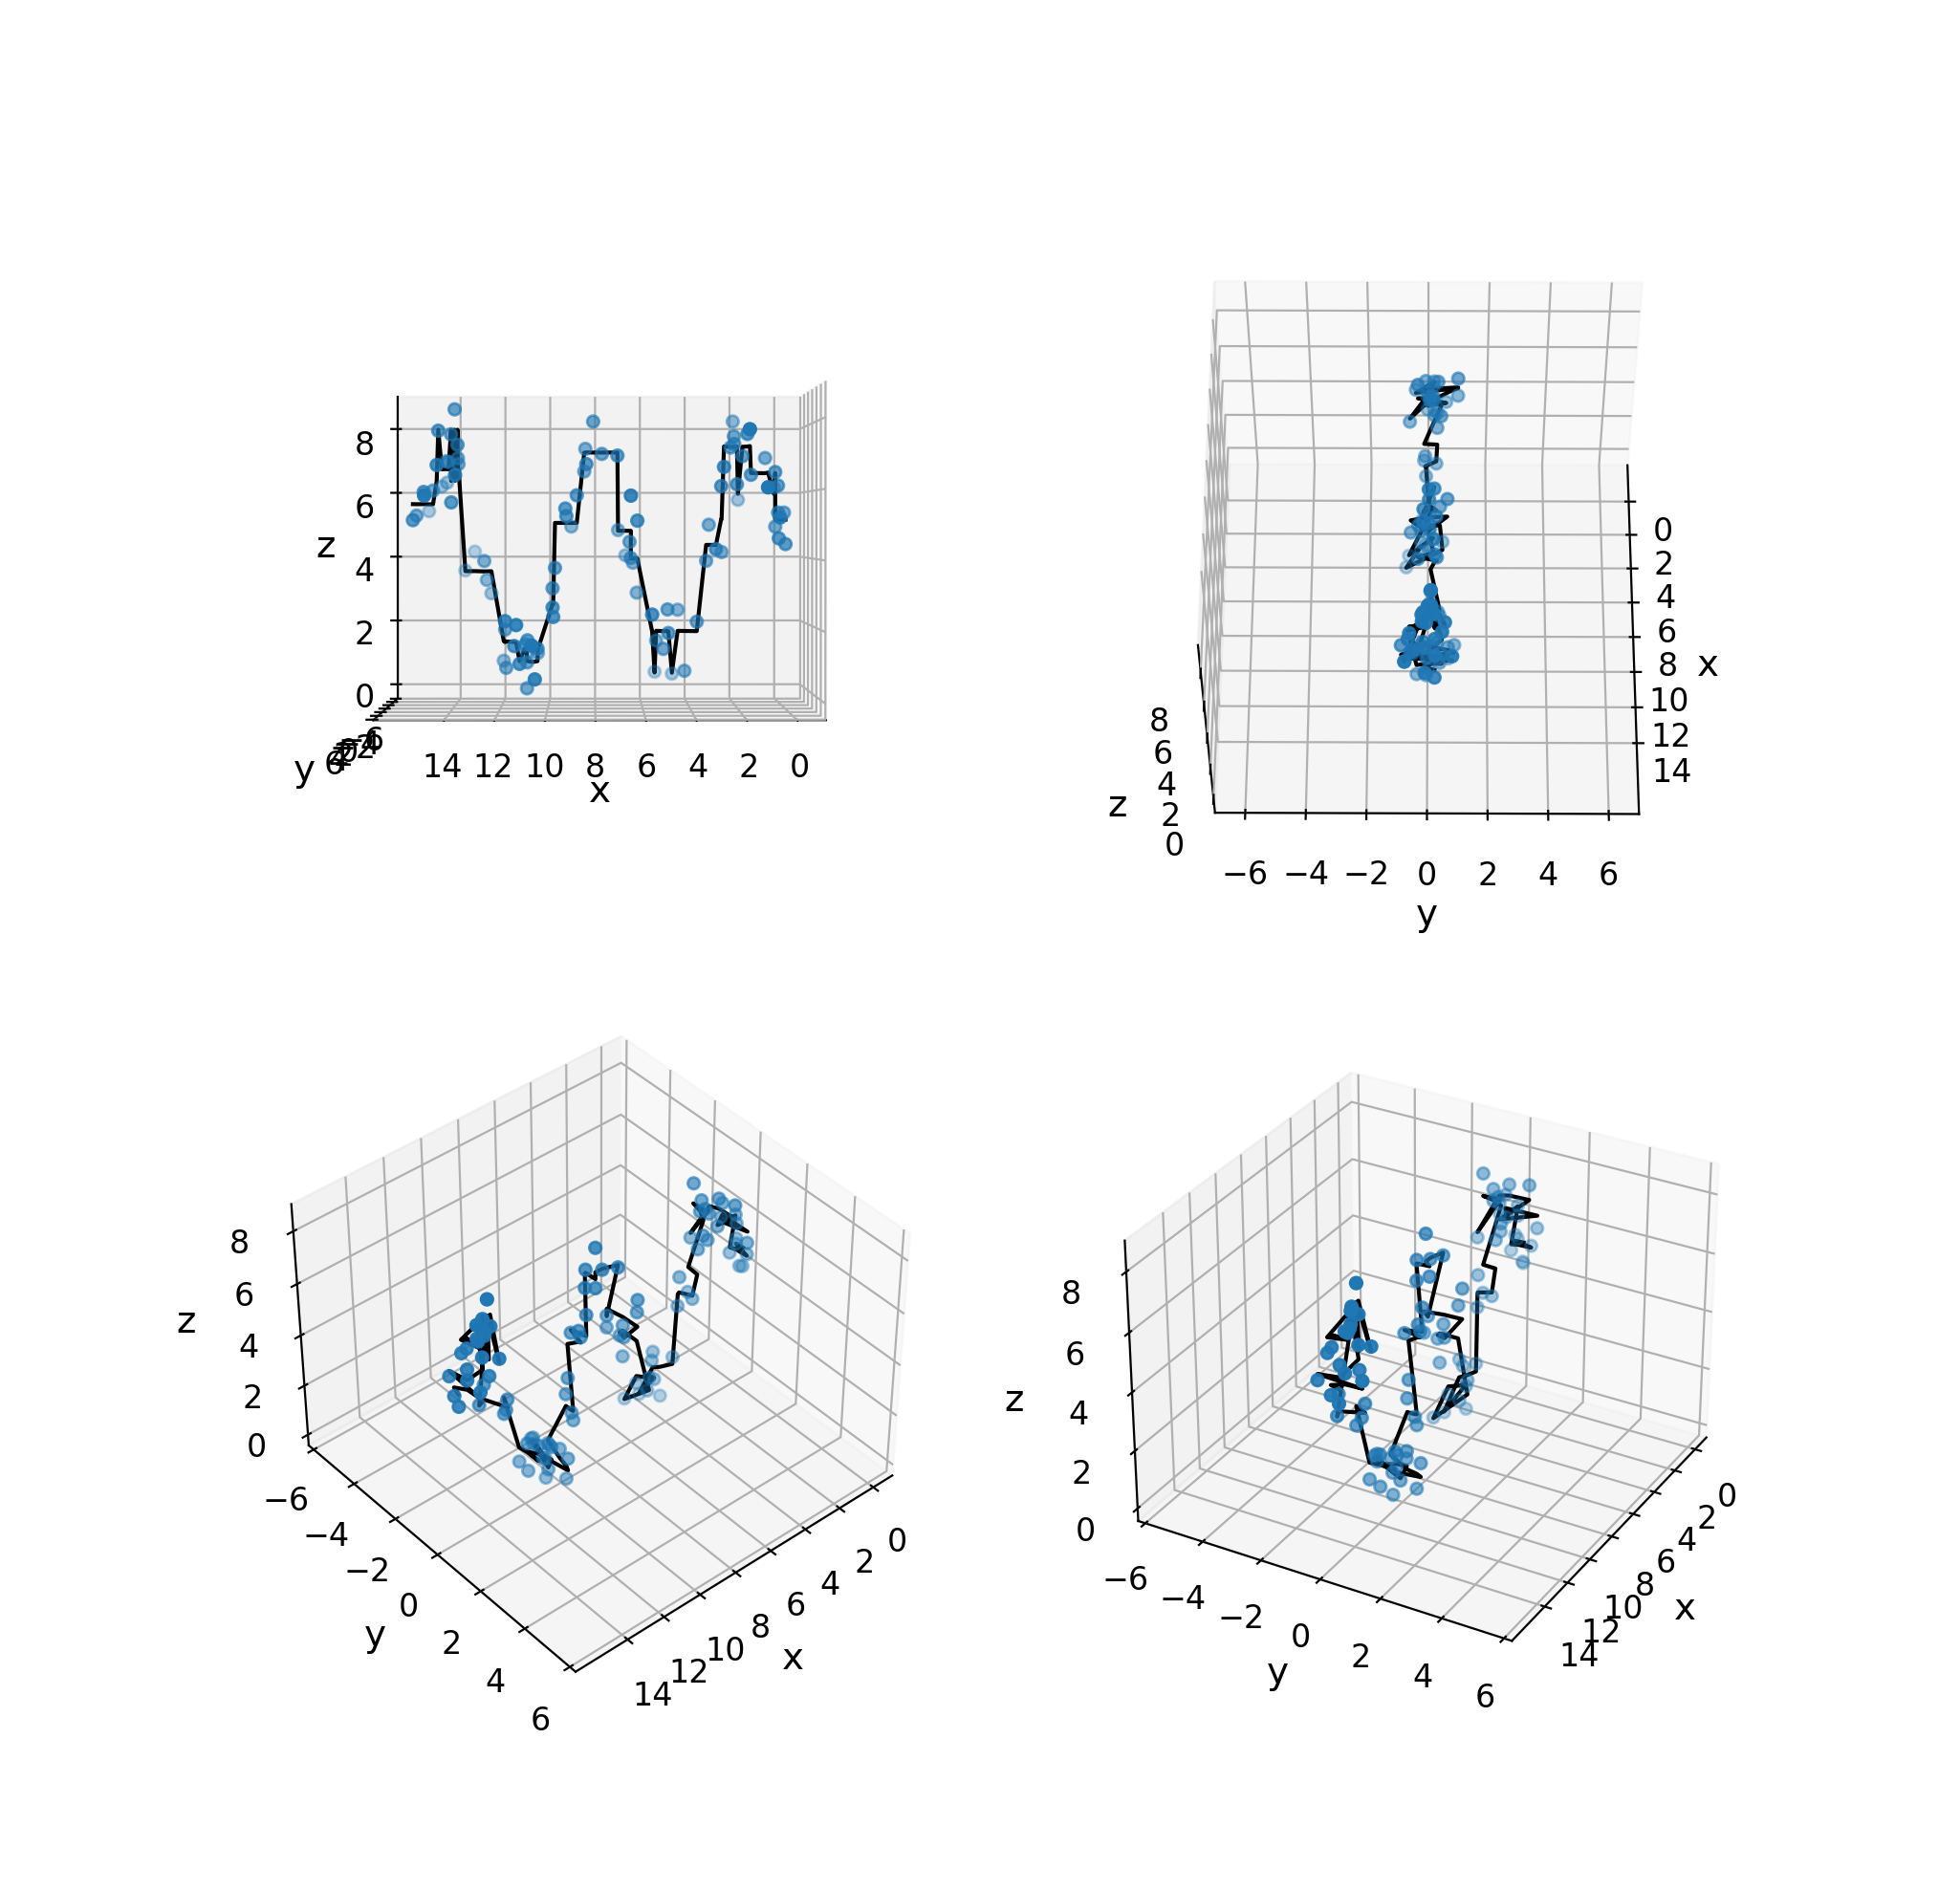

In [33]:
plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)

# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four significant digits.  Print the generalization error for all three models.

In [34]:
from sklearn.metrics import mean_squared_error
y_gbrt_pred = gbrt.predict(X_test)
gbrt_mse = mean_squared_error(z_test, y_gbrt_pred)
gbrt_mse = round(gbrt_mse,4)
print("Gradient Booster Regresssor model MSE:",gbrt_mse)

Gradient Booster Regresssor model MSE: 0.4549


In [35]:
y_rnd_reg_pred = rnd_reg.predict(X_test)
rnd_reg_mse = mean_squared_error(z_test, y_rnd_reg_pred)
rnd_reg_mse = round(rnd_reg_mse,4)
print("Random Forest Regressor model MSE:",rnd_reg_mse)

Random Forest Regressor model MSE: 0.5491


In [36]:
y_tree_reg_pred = tree_reg.predict(X_test)
tree_reg_mse = mean_squared_error(z_test, y_tree_reg_pred)
tree_reg_mse = round(tree_reg_mse,4)
print("Decision Tree Regressor model MSE:",tree_reg_mse)

Decision Tree Regressor model MSE: 0.7264
